## Implemantation of ANN using Keras

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import pandas as pd
import keras

2024-02-17 10:32:42.339138: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-17 10:32:42.393972: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-17 10:32:42.394015: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-17 10:32:42.395731: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-17 10:32:42.403986: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-17 10:32:42.404904: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
print(tf.__version__)

2.15.0


In [3]:
# tf.keras.__verison__

In [4]:
## Gpu or Cpu Check
tf.config.list_physical_devices('GPU')

[]

In [5]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
os.getcwd()
#  to kuw the current working directory of the files

'/workspaces/Data_science_1/DeepLearning'

### Creating a simple classifer using oMNIST dataSet

In [7]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/home/codespace/.python/current/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_train.shape,x_test.shape  

((60000, 28, 28), (10000, 28, 28))

In [10]:
x_train[0].shape

(28, 28)

In [11]:
x_train.dtype

dtype('uint8')

In [12]:
x_valid, x_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [13]:
x_test = x_test / 255.0

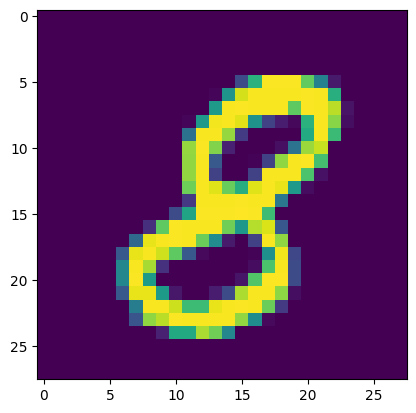

In [14]:
plt.imshow(x_train[5])
# plt.show()

<Axes: >

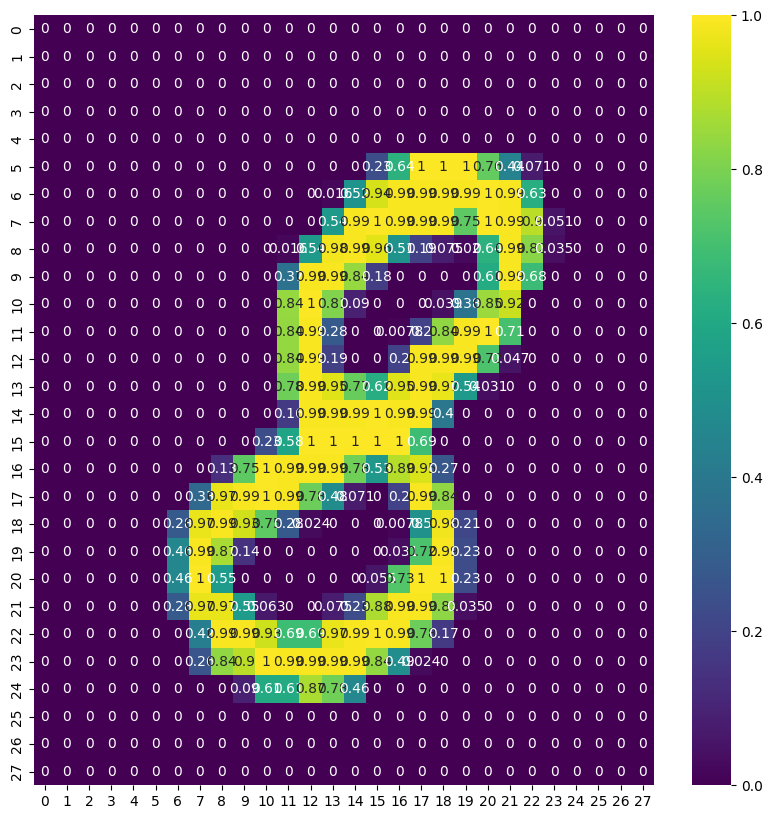

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(x_train[5], annot=True, cmap='viridis')

In [16]:
# Method 1
layers = [
    tf.keras.layers.Flatten(input_shape=[28, 28], name='input_layer'),
    tf.keras.layers.Dense(300, activation='relu', name='hidden_layer1'),
    tf.keras.layers.Dense(100, activation='relu', name='hidden_layer2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output_layer')
]

mode_clf = tf.keras.models.Sequential(layers)


In [17]:
# method 2
from keras.models import Sequential
from keras.layers import Flatten, Dense

# Definig the model
model = Sequential()
model.add(Dense(300, activation='relu', input_shape=(28, 28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [18]:
mode_clf.layers

In [19]:
mode_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer1 (Dense)       (None, 300)               235500    
                                                                 
 hidden_layer2 (Dense)       (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 300)           8700      
                                                                 
 dense_1 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_2 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39810 (155.51 KB)
Trainable params: 39810 (155.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
layer_1=mode_clf.layers[1]
# For the 0 th index we will get the input layer
layer_1.name

'hidden_layer1'

In [22]:
layer_1.get_weights()

[array([[ 0.07089172,  0.0596415 , -0.02210261, ..., -0.03416742,
         -0.07109015, -0.05223409],
        [-0.01220313,  0.06658639, -0.01362287, ...,  0.06643614,
          0.00401229, -0.05066799],
        [-0.02414851, -0.0590217 ,  0.01165927, ..., -0.04739294,
         -0.0519882 , -0.0236905 ],
        ...,
        [ 0.03604266,  0.02498334,  0.0050161 , ..., -0.04861055,
          0.01025796,  0.07073155],
        [ 0.00897248,  0.03767408,  0.06686515, ...,  0.03137943,
         -0.06378846, -0.01770844],
        [-0.04375778,  0.02141675,  0.07248199, ..., -0.01212345,
          0.04577383,  0.03240958]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [23]:
layer_1.get_weights()[0].shape,layer_1.get_weights()[1].shape

((784, 300), (300,))

In [24]:
weights, biases = layer_1.get_weights()

In [25]:
weights.shape, biases.shape

((784, 300), (300,))

In [26]:
# we can alsoi assign the custom learning rate to SGD optimizer like tf.keras.optimizers.SGD(learning_rate=0.01)
# or tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
# or tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

In [27]:
mode_clf.compile(loss='sparse_categorical_crossentropy',
                 optimizer='sgd',
              metrics=['accuracy'])

In [28]:
history = mode_clf.fit(x_train, y_train, epochs=10,batch_size=32)

Epoch 1/30


2024-02-17 10:32:49.174628: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 4s 2ms/step - loss: 0.5916 - accuracy: 0.8470
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2850 - accuracy: 0.9178
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2328 - accuracy: 0.9327
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1991 - accuracy: 0.9422
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1729 - accuracy: 0.9502
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1536 - accuracy: 0.9561
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1372 - accuracy: 0.9607
Epoch 8/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1235 - accuracy: 0.9651
Epoch 9/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1127 - accuracy: 0.9678
Epoch 10/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1028 - accurac

In [29]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

<Axes: >

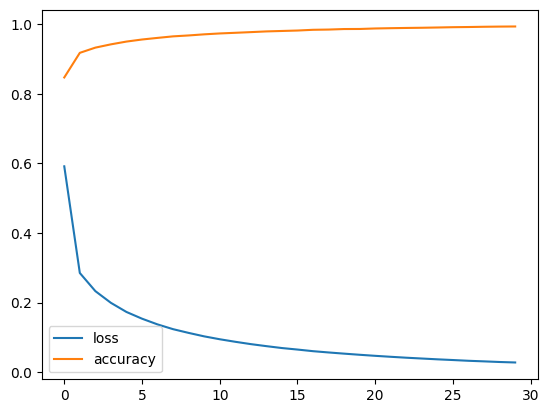

In [30]:
pd.DataFrame(history.history).plot()

In [31]:
mode_clf.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0680 - accuracy: 0.9783


[0.06799320131540298, 0.9782999753952026]

In [32]:
pd.DataFrame(history.history);

In [33]:
y_prob = mode_clf.predict(x_test[:3])
y_pred = np.argmax(y_prob, axis=-1)
y_pred

1/1 [==============================] - 0s 108ms/step


array([7, 2, 1])

In [34]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

In [35]:
y_pred = mode_clf.predict(x_test)
y_pred

313/313 [==============================] - 0s 1ms/step


array([[1.5277121e-06, 3.6566234e-07, 5.2356641e-05, ..., 9.9959344e-01,
        6.6624016e-06, 2.4436031e-05],
       [7.9223628e-07, 1.8209241e-05, 9.9983454e-01, ..., 1.6428043e-12,
        3.9617655e-05, 2.2007188e-12],
       [8.2201714e-06, 9.9845141e-01, 1.3311942e-04, ..., 7.5014372e-04,
        3.5465974e-04, 8.1666540e-06],
       ...,
       [8.0622931e-10, 1.2847184e-10, 4.0347427e-11, ..., 5.2530236e-06,
        2.3286829e-07, 3.1621530e-05],
       [1.6470415e-07, 4.5598277e-08, 8.8416485e-10, ..., 1.6424722e-09,
        7.8504578e-05, 5.9684223e-11],
       [5.4932929e-08, 4.4767461e-11, 1.2235773e-08, ..., 3.1046899e-12,
        4.2102934e-09, 1.4326107e-10]], dtype=float32)

In [36]:
y_pred = np.argmax(y_pred, axis=-1)

In [37]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])